# Lista 6

In [37]:
from scipy.integrate import quad
from scipy.interpolate import interp1d
from scipy.stats import poisson
import numpy as np, matplotlib.pyplot as plt

## zadanie 1

Napisz algorytm, który dla ustalonej niejednorodnej funkcji intensywności λ(t) generuje czasy oczekiwania niejednorodnego procesu Poissona metodą przerzedzania.
Sprawdź poprawność jego działania weryfikując, że $N_t ∼ Poiss(\int_0^t \lambda(s) \operatorname{d}\!s)$.


In [29]:
def lambda1(x):
    return np.sin(x)**2

In [74]:
def poiss_thinning(lambd, T):
    t = 0 
    I = 0
    S = []

    max_lam = max(lambd(t) for t in np.linspace(0, T, 1000))

    while t < T:
        u1 = np.random.rand()
        t += -np.log(u1) / max_lam

        u2 = np.random.rand()

        if u2 <= lambd(t) / max_lam:
            I += 1
            S.append(t)

    return S

points = poiss_thinning(lambda1, 50)

In [63]:
def t4(t):
    return t**4

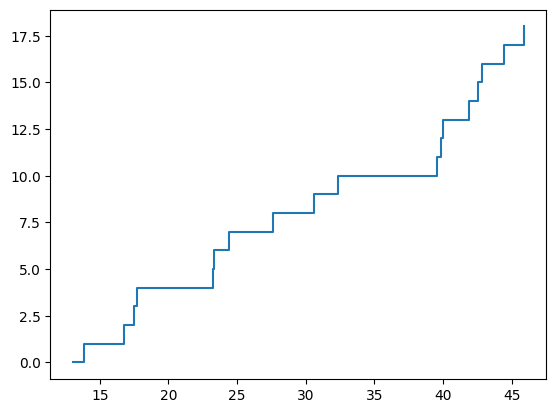

In [81]:
times = np.linspace(0,T, 1000)
plt.step(points, range(len(points)), where='post')

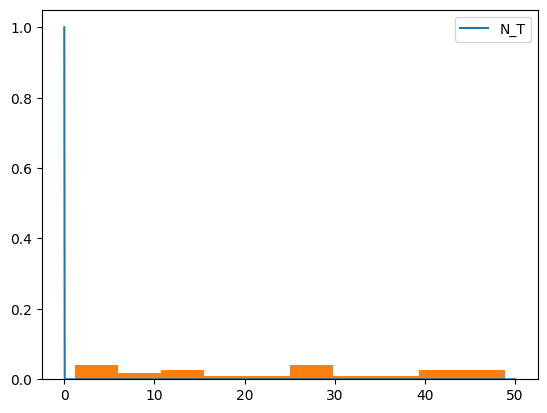

In [92]:
def plotowanie(lamda1, T):
    o = poiss(lambda1, T)
    times = np.linspace(0,T, 1000)
    a = [poisson.pmf(t, quad(lambda1, 0, t)[0]) for t in times]
    plt.plot(times, a, label = 'N_T')
    plt.hist(o, density = True)
    plt.legend()

plotowanie(lambda1, 50)

## zadanie 2

In [12]:
def m(t, lambd):
    x, _ = quad(lambd,0,t)
    return x

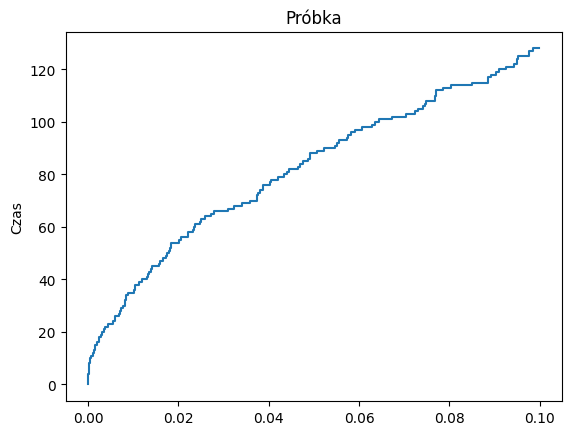

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def times(m_T, m_function, T):
    # Generate random variable NT from Poisson distribution with lambda = m(T)
    NT = np.random.poisson(m_T)
    
    # Generate sorted waiting times based on F(t) = m(t) / m(T)
    sorted_waiting_times = np.sort(m_function(np.random.rand(NT)) / m_T * T)
    
    return sorted_waiting_times

def m_function(t):
    return t**2

T = 10  
m_T = m_function(T) 

tims = times(m_T, m_function, T)

plt.step(tims, np.arange(len(tims)))
plt.ylabel('Czas')
plt.title('Próbka')
plt.show()


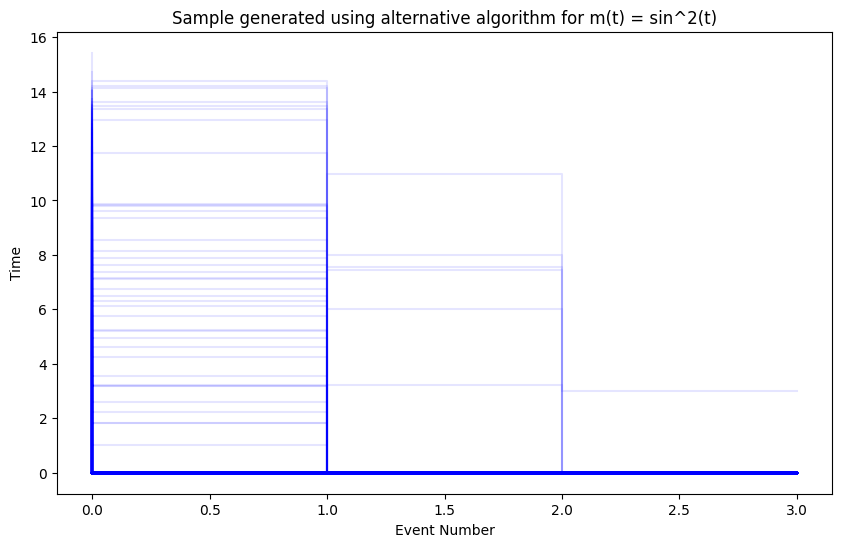

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sample_from_m_T(m_T, T, num_samples=1000):
    # Generate random variable NT from Poisson distribution with lambda = m(T)
    NT = np.random.poisson(m_T, num_samples)
    
    # Initialize an empty array to store the waiting times
    waiting_times = np.zeros((num_samples, max(NT)))
    
    # Generate waiting times using inverse transform sampling
    for i in range(num_samples):
        # Generate random uniform variables
        u = np.random.rand(NT[i])
        # Calculate waiting times using inverse transform sampling
        waiting_times[i, :NT[i]] = np.arcsin(np.sqrt(u)) * T
    
    return waiting_times

# Example usage
T = 10  # Time horizon
num_samples = 1000  # Number of samples
m_T = np.sin(T) ** 2  # Calculate m(T)

# Generate a sample using the alternative algorithm
sample = generate_sample_from_m_T(m_T, T, num_samples)

# Plot the generated sample
plt.figure(figsize=(10, 6))
for i in range(num_samples):
    plt.step(np.arange(len(sample[i])), sample[i], alpha=0.1, color='blue')
plt.xlabel('Event Number')
plt.ylabel('Time')
plt.title('Sample generated using alternative algorithm for m(t) = sin^2(t)')
plt.show()


## zadanie 3

Text(0, 0.5, 'Średnia liczba zdarzeń')

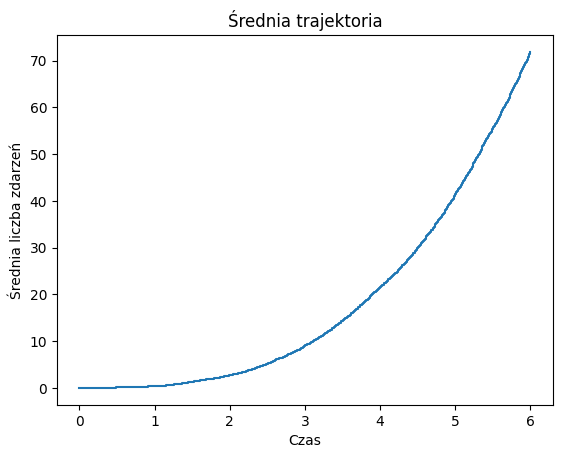

In [24]:
def inh_poiss(lambd, T, n, nn):
    times = np.linspace(0, T, n)
    ms = [quad(lambd,0,t)[0] for t in times]
    T_tilde = ms[-1]
    m_inv = interp1d(ms, times, fill_value='extrapolate')

    t = 0
    I = 0
    S = []

    while True:
        U = np.random.uniform()
        t += -np.log(U)
        if t > T_tilde:
            break
        I += 1
        S.append(m_inv(t))

    full_time = np.linspace(0,T, nn)
    full_trajectory = np.zeros_like(full_time)

    for jump_time in S:
        full_trajectory[full_time >= jump_time] += 1

    return S, full_trajectory, full_time

def lam1(t):
    return t**2

def lam2(t):
    return t**4

T = 6
n = 100
nn = 500
full_time = np.linspace(0,T, nn)
tr = np.array([inh_poiss(lam1, T, n, nn)[1] for _ in range(n)])
avt = np.mean(tr, axis = 0)
plt.step(full_time, avt, where='post')
plt.title('Średnia trajektoria')
plt.xlabel('Czas')
plt.ylabel('Średnia liczba zdarzeń')

In [25]:
S1, tr1, t1 = inh_poiss(lam1, T, n, nn)
S2, tr2, t2 = inh_poiss(lam1, T, n, nn)

combined_t = np.sort(np.concatenate((S1,S2)))
tr3 = np.zeros_like(full_time)
for jump in combined_t:
    tr3[full_time >= jump] += 1
    

Text(0, 0.5, 'Liczba zdarzeń')

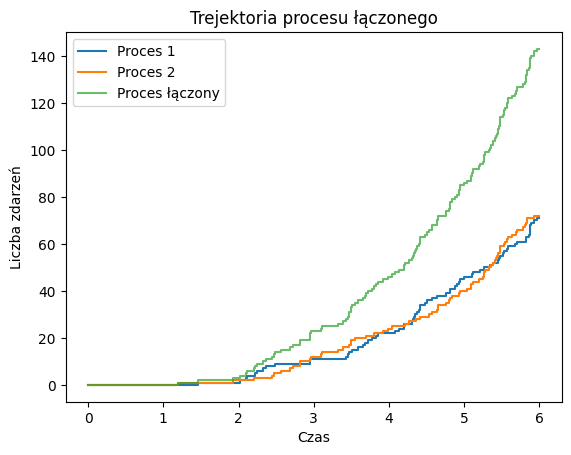

In [27]:
plt.step(t1, tr1, where='post', label = 'Proces 1')
plt.step(t2, tr2, where='post', label = 'Proces 2')
plt.step(full_time, tr3, where='post', label = 'Proces łączony', alpha = 0.7)
plt.legend()
plt.title('Trejektoria procesu łączonego')
plt.xlabel('Czas')
plt.ylabel('Liczba zdarzeń')

## zadanie 4

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def poisson_process(T, FZ, num_samples=1000):
    t_values = np.linspace(0, T, num_samples)

    Yt = np.zeros_like(t_values)
    for i in range(1, len(t_values)):
        dt = t_values[i] - t_values[i - 1]
        lambda_t = FZ(np.random.uniform(0, T))
        Yt[i] = Yt[i - 1] + np.random.poisson(lambda_t * dt)

    return t_values, Yt


def FZ(z):
    return  z**4

Text(0.5, 1.0, 'Trajektoria złożonego procesu Poissona')

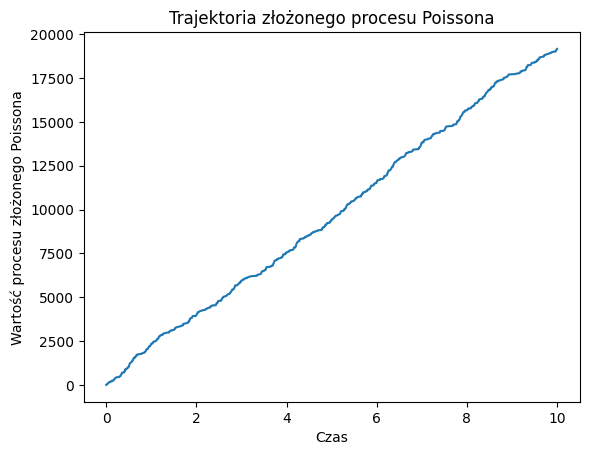

In [36]:
T = 10  
t_values, Yt = poisson_process(T, FZ)
plt.plot(t_values, Yt)
plt.xlabel('Czas')
plt.ylabel('Wartość procesu złożonego Poissona')
plt.title('Trajektoria złożonego procesu Poissona')
